In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt


In [2]:
filename = 'https://apmonitor.com/do/uploads/Main/tclab_dyn_data2.txt'

In [3]:
# heater steps
Q1d = np.zeros(601)
Q1d[10:200] = 80
Q1d[200:280] = 20
Q1d[280:400] = 70
Q1d[400:] = 50

Q2d = np.zeros(601)
Q2d[120:320] = 100
Q2d[320:520] = 10
Q2d[520:] = 80

In [4]:
# read data file
data = pd.read_csv(filename)

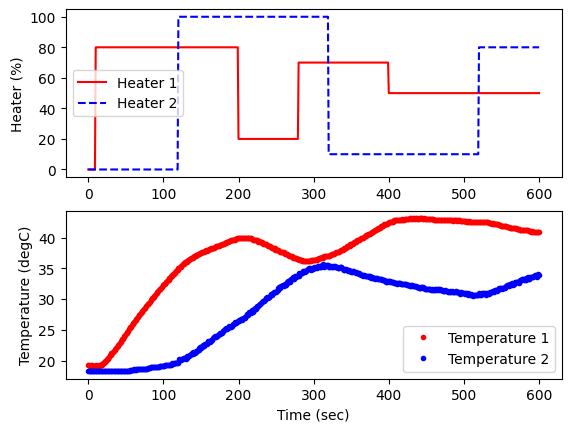

In [5]:
# plot measurements
plt.figure()
plt.subplot(2,1,1)
plt.plot(data['Time'],data['H1'],'r-',label='Heater 1')
plt.plot(data['Time'],data['H2'],'b--',label='Heater 2')
plt.ylabel('Heater (%)')
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.plot(data['Time'],data['T1'],'r.',label='Temperature 1')
plt.plot(data['Time'],data['T2'],'b.',label='Temperature 2')
plt.ylabel('Temperature (degC)')
plt.legend(loc='best')
plt.xlabel('Time (sec)')

plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

In [7]:
# initialize GEKKO model
m = GEKKO()

# Model discretized time
n = 60 * 10 + 1 # number of second time points (10 min)
m.time = np.linspace(0, n-1, n) # Time vector

In [8]:
Q1 = m.Param()
Q1.value = Q1d

Q2 = m.Param()
Q2.value = Q2d

In [9]:
T0 = m.Param(value=19.0+273.15)     # Initial temperature
Ta = m.Param(value=19.0+273.15)     # K
U =  m.Param(value=10.0)            # W/m^2-K
mass = m.Param(value=4.0/1000.0)    # kg
Cp = m.Param(value=0.5*1000.0)      # J/kg-K    
A = m.Param(value=10.0/100.0**2)    # Area not between heaters in m^2
As = m.Param(value=2.0/100.0**2)    # Area between heaters in m^2
alpha1 = m.Param(value=0.01)        # W / % heater
alpha2 = m.Param(value=0.005)      # W / % heater
eps = m.Param(value=0.9)            # Emissivity
sigma = m.Const(5.67e-8)            # Stefan-Boltzman


In [10]:
# Temperature states as GEKKO variables
T1 = m.Var(value=T0)
T2 = m.Var(value=T0)

In [11]:
# Between two heaters
Q_C12 = m.Intermediate(U*As*(T2-T1)) # Convective
Q_R12 = m.Intermediate(eps*sigma*As*(T2**4-T1**4)) # Radiative

m.Equation(T1.dt() == (1.0/(mass*Cp))*(U*A*(Ta-T1) \
                    + eps * sigma * A * (Ta**4 - T1**4) \
                    + Q_C12 + Q_R12 \
                    + alpha1*Q1))

m.Equation(T2.dt() == (1.0/(mass*Cp))*(U*A*(Ta-T2) \
                    + eps * sigma * A * (Ta**4 - T2**4) \
                    - Q_C12 - Q_R12 \
                    + alpha2*Q2))

In [12]:
# simulation mode
m.options.IMODE = 4

# simulation model
m.solve()


apm 89.210.224.136_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            1
   Variables    :           14
   Intermediates:            2
   Connections  :            0
   Equations    :            4
   Residuals    :            2
 
 Number of state variables:           2400
 Number of total equations: -         2400
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Dynamic Simulation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains 

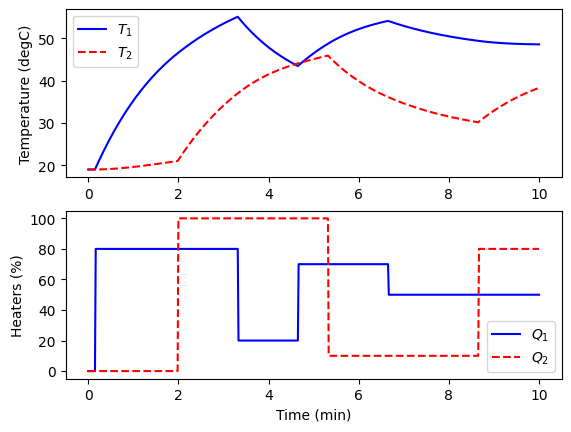

In [19]:
# plot results
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(m.time/60.0, np.array(T1.value)-273.15, 'b-')
plt.plot(m.time/60.0, np.array(T2.value)-273.15, 'r--')
# plt.plot(m.time/60.0,data['T1'],'r.')
# plt.plot(m.time/60.0,data['T2'],'b.')
plt.legend([r'$T_1$',r'$T_2$', 'Temperature 1', 'Temperature 2'],loc='best')
plt.ylabel('Temperature (degC)')

plt.subplot(2, 1, 2)
plt.plot(m.time/60.0, np.array(Q1.value), 'b-')
plt.plot(m.time/60.0, np.array(Q2.value), 'r--')
plt.legend([r'$Q_1$',r'$Q_2$'],loc='best')
plt.ylabel('Heaters (%)')

plt.xlabel('Time (min)')
plt.show()

In [1]:
pip install jupyterlab-git

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
